# Lab Segmentation 2

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [6]:
def getThreshold(img):
   
    if img.ndim == 3:
        img = rgb2gray(img) * 255
    img = img.astype('uint8')

    hist_original = histogram(img)
    hist = (np.array([0] * hist_original[1][0] + list(hist_original[0]) + [0] * (255 - hist_original[1][-1])), np.arange(256))

    num_of_pixels = img.shape[0] * img.shape[1]
    threshold = round(np.sum(hist[0] * hist[1]) / num_of_pixels)
    
    prev_threshold = None
    while prev_threshold != threshold:
        lower = hist[1][: threshold]
        lower_values = hist[0][: threshold]
        threshold_lower_half = round(np.sum(lower_values *  lower) / np.sum(lower_values))

        higher = hist[1][threshold :]
        higher_values = hist[0][threshold :]

        threshold_higher_half = round(np.sum(higher_values *  higher) / np.sum(higher_values))

        prev_threshold = threshold
        threshold = round((threshold_higher_half + threshold_lower_half) / 2)

    return threshold

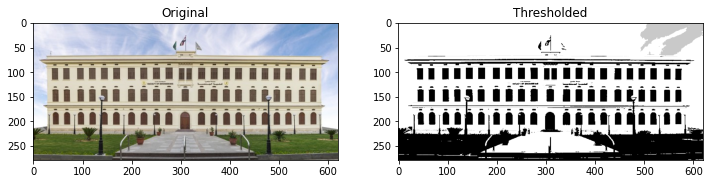

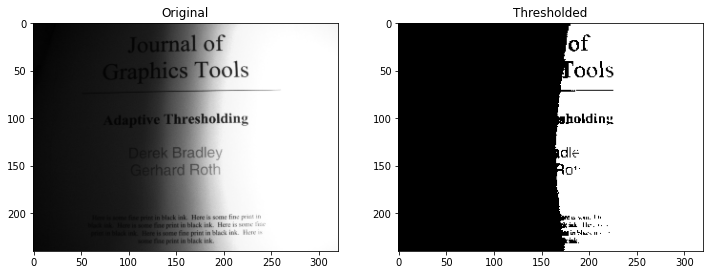

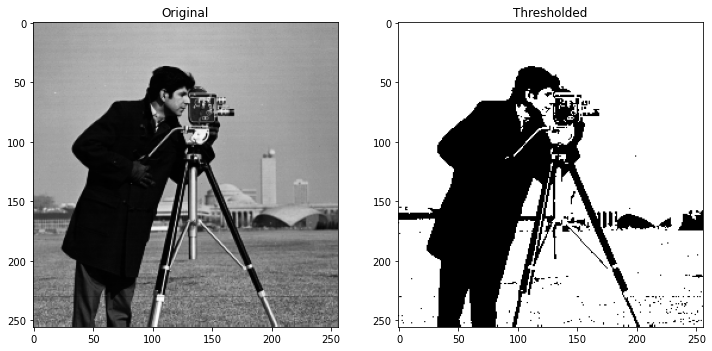

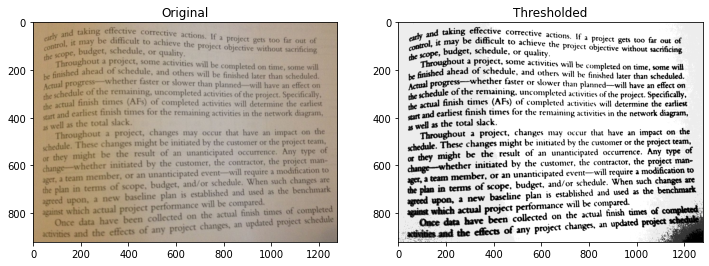

In [7]:
img = io.imread('cufe.png')
original = img.copy()
threshold = getThreshold(img)
img[img < threshold] = 0
img[img >= threshold] = 255
img = rgb2gray(img) * 255
show_images([original, img], ['Original', 'Thresholded'])

img = io.imread('book.png')
original = img.copy()
threshold = getThreshold(img)
img[img < threshold] = 0
img[img >= threshold] = 255
show_images([original, img], ['Original', 'Thresholded'])

img = io.imread('cameraman.png')
original = img.copy()
threshold = getThreshold(img)
img[img < threshold] = 0
img[img >= threshold] = 255
show_images([original, img], ['Original', 'Thresholded'])

img = io.imread('book1.png')
original = img.copy()
# img = rgb2gray(img)
threshold = getThreshold(img)
img[img < threshold] = 0
img[img >= threshold] = 255
img = rgb2gray(img) * 255
show_images([original, img], ['Original', 'Thresholded'])







In [8]:
def adaptive_thresholding(img):
   
    upperleft = img[ : img.shape[0] // 2, : img.shape[1] // 2]
    lowerleft = img[img.shape[0] // 2 : , : img.shape[1] // 2]
    lowerright = img[img.shape[0] // 2 : , img.shape[1] // 2 : ]
    upperright = img[ : img.shape[0] // 2, img.shape[1] // 2 : ]
    # show_images([upperleft, lowerleft, lowerright, upperright], ['', '', '', ''])

    tul = getThreshold(upperleft)
    tll = getThreshold(lowerleft)
    tlr = getThreshold(lowerright)
    tur = getThreshold(upperright)


    upperleft[upperleft < tul] = 0
    upperleft[upperleft >= tul] = 255   

    lowerleft[lowerleft < tll] = 0
    lowerleft[lowerleft >= tll] = 255

    lowerright[lowerright < tlr] = 0
    lowerright[lowerright >= tlr] = 255

    upperright[upperright < tur] = 0
    upperright[upperright >= tur] = 255

    upper_half = np.concatenate((upperleft, upperright), axis=1)
    lower_half = np.concatenate((lowerleft, lowerright), axis=1)
    new_img = np.concatenate((upper_half, lower_half), axis=0)
    return new_img


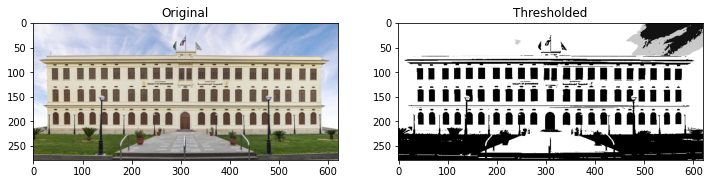

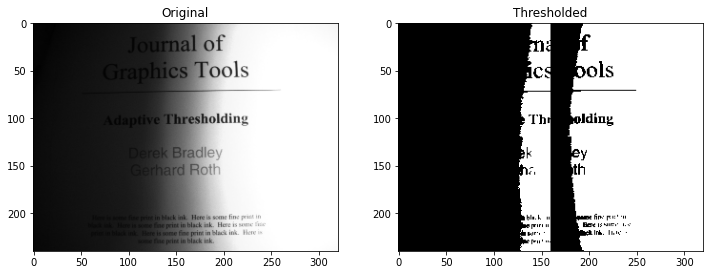

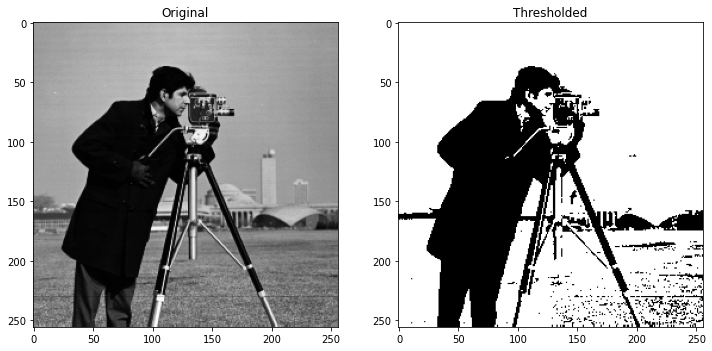

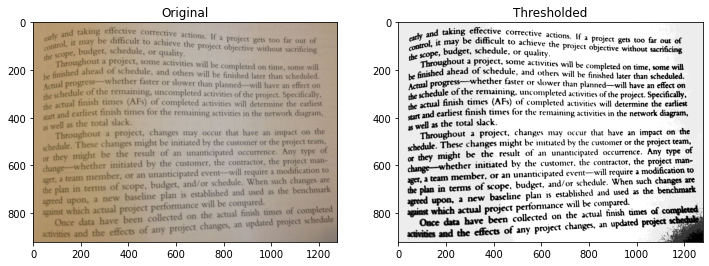

In [5]:

img = io.imread('cufe.png')
original = img.copy()
new_img = adaptive_thresholding(img)
new_img = rgb2gray(new_img)
show_images([original, new_img], ['Original', 'Thresholded'])

img = io.imread('book.png')
original = img.copy()
new_img = adaptive_thresholding(img)
show_images([original, new_img], ['Original', 'Thresholded'])

img = io.imread('cameraman.png')
original = img.copy()
new_img = adaptive_thresholding(img)
show_images([original, new_img], ['Original', 'Thresholded'])

img = io.imread('book1.png')
original = img.copy()
new_img = adaptive_thresholding(img)
new_img = rgb2gray(new_img)
show_images([original, new_img], ['Original', 'Thresholded'])
